In [22]:
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statannot import add_stat_annotation

%matplotlib inline

In [23]:
df_results = pd.read_csv('results.csv')
df_results.loc[df_results['frame_to_predict'] == -1, 'frame_to_predict'] = 417
df_results

,color,frame_to_predict,max_trained_frame,predicted_frame,size_window,ssim_11,ssim_11_baseline,ssim_1,ssim_1_baseline
0,red,50,50,1,3,0.9637,0.9702,0.9383,0.9961
1,green,50,50,1,3,0.9681,0.9726,0.9187,0.9958
2,blue,50,50,1,3,0.9704,0.9720,0.9671,0.9960
3,red,50,50,6,3,0.8768,0.8949,0.8850,0.9776
4,green,50,50,6,3,0.8872,0.8949,0.8829,0.9752
...,...,...,...,...,...,...,...,...,...
427,green,417,400,18,3,0.7935,0.8494,0.7372,0.9458
428,blue,417,400,18,3,0.7837,0.8374,0.7264,0.9446
429,red,417,400,36,3,0.7246,0.7819,0.7524,0.9150
430,green,417,400,36,3,0.6880,0.7846,0.7021,0.9096


Questions:
- Is there any difference for how early the frame is predicted?
- Does time matter when predicting the frames? (paired t-test)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 6: t-test paired samples with Bonferroni correction, P_val=9.904e-80 stat=5.490e+01
1 v.s. 18: t-test paired samples with Bonferroni correction, P_val=1.467e-75 stat=5.002e+01
1 v.s. 36: t-test paired samples with Bonferroni correction, P_val=1.954e-71 stat=4.558e+01


Text(63.0, 0.5, 'SSIM')

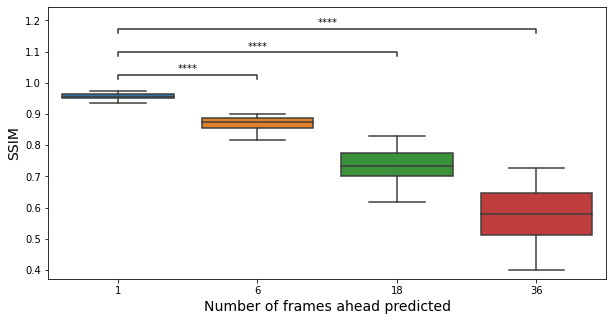

In [24]:
# Q: Is there any difference for how early the frame is predicted?
# A: As we can see, how early we make the prediction influences the result.

x = "predicted_frame"
y = "ssim_11"
box_pairs=[
    ((1), (6)),
    ((1), (18)),
    ((1), (36))
]
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.boxplot(data=df_results, x=x, y=y, ax=axs)
add_stat_annotation(ax, data=df_results, x=x, y=y, box_pairs=box_pairs,
                    test='t-test_paired', loc='inside', verbose=2)
axs.set_xlabel("Number of frames ahead predicted", fontsize=14)
axs.set_ylabel("SSIM", fontsize=14)

In [25]:
# x = "frame_to_predict"
# y = "ssim_11"
# box_pairs=[
#     ((50), (100)),
#     ((50), (150)),
#     ((50), (200))
# ]
# fig, axs = plt.subplots(1, 1, figsize=(10, 5))
# ax = sns.boxplot(data=df_results, x=x, y=y, ax=axs)
# add_stat_annotation(ax, data=df_results, x=x, y=y, box_pairs=box_pairs,
#                     test='t-test_paired', loc='inside', verbose=2)
# # axs.set_xlabel("", fontsize=14)
# axs.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

50 v.s. 100: t-test paired samples with Bonferroni correction, P_val=3.314e-01 stat=-2.308e+00
100 v.s. 150: t-test paired samples with Bonferroni correction, P_val=7.803e-15 stat=6.725e+01
100 v.s. 200: t-test paired samples with Bonferroni correction, P_val=1.329e-09 stat=2.229e+01
100 v.s. 250: t-test paired samples with Bonferroni correction, P_val=2.071e-07 stat=1.387e+01
100 v.s. 300: t-test paired samples with Bonferroni correction, P_val=1.165e-07 stat=1.465e+01
100 v.s. 350: t-test paired samples with Bonferroni correction, P_val=2.689e-04 stat=6.703e+00
100 v.s. 400: t-test paired samples with Bonferroni correction, P_val=2.366e-06 stat=1.095e+01
100 v.s. 417: t-test paired samples with Bonferroni correction, P_val=3.001e-06 stat=1.070e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5

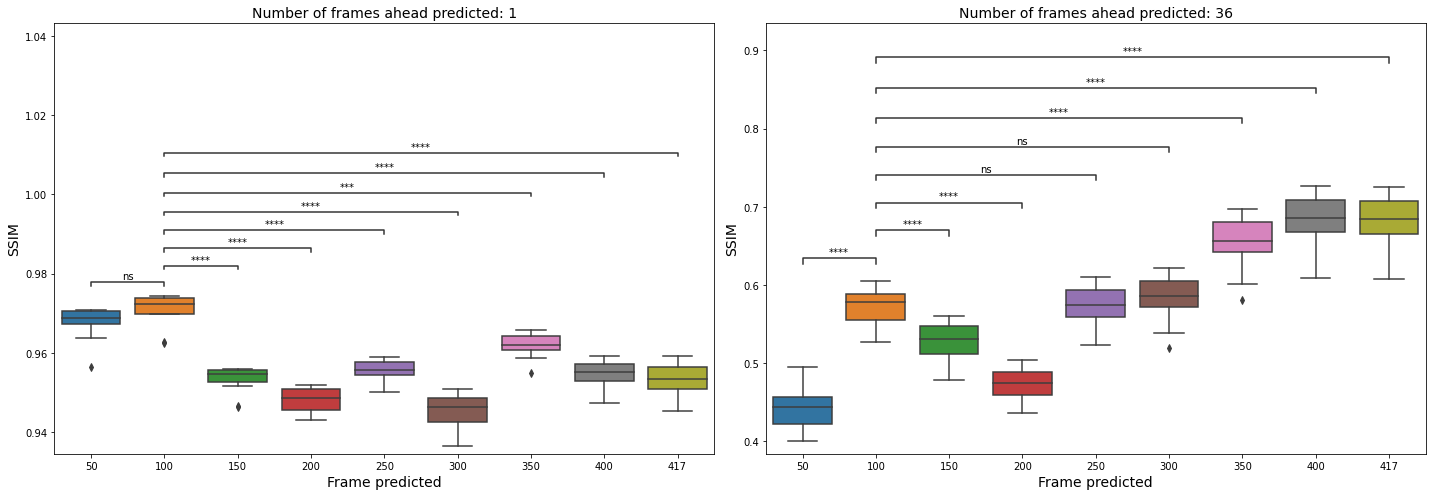

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7))

df_results_timeframe = df_results[df_results['predicted_frame'] == 1]
x = "frame_to_predict"
y = "ssim_11"
box_pairs=[
    ((100), (50)),
    ((100), (150)),
    ((100), (200)),
    ((100), (250)),
    ((100), (300)),
    ((100), (350)),
    ((100), (400)),
    ((100), (417))
]

ax = sns.boxplot(data=df_results_timeframe, x=x, y=y, ax=axs[0])
add_stat_annotation(ax, data=df_results_timeframe, x=x, y=y, box_pairs=box_pairs,
                    test='t-test_paired', loc='inside', verbose=2)
axs[0].set_xlabel("Frame predicted", fontsize=14)
axs[0].set_ylabel("SSIM", fontsize=14)
axs[0].set_title("Number of frames ahead predicted: 1", fontsize=14)

df_results_timeframe = df_results[df_results['predicted_frame'] == 36]
x = "frame_to_predict"
y = "ssim_11"
box_pairs=[
    ((100), (50)),
    ((100), (150)),
    ((100), (200)),
    ((100), (250)),
    ((100), (300)),
    ((100), (350)),
    ((100), (400)),
    ((100), (417))
]
ax = sns.boxplot(data=df_results_timeframe, x=x, y=y, ax=axs[1])
add_stat_annotation(ax, data=df_results_timeframe, x=x, y=y, box_pairs=box_pairs,
                    test='t-test_paired', loc='inside', verbose=2)
axs[1].set_xlabel("Frame predicted", fontsize=14)
axs[1].set_ylabel("SSIM", fontsize=14)
axs[1].set_title("Number of frames ahead predicted: 36", fontsize=14)
plt.tight_layout()

In [34]:
df_results_timeframe

,color,frame_to_predict,max_trained_frame,predicted_frame,size_window,ssim_11,ssim_11_baseline,ssim_1,ssim_1_baseline
0,red,50,50,1,3,0.9637,0.9702,0.9383,0.9961
1,green,50,50,1,3,0.9681,0.9726,0.9187,0.9958
2,blue,50,50,1,3,0.9704,0.9720,0.9671,0.9960
12,red,50,100,1,3,0.9673,0.9702,0.9482,0.9961
13,green,50,100,1,3,0.9701,0.9726,0.9551,0.9958
...,...,...,...,...,...,...,...,...,...
409,green,Last frame,200,1,3,0.9578,0.9602,0.9570,0.9908
410,blue,Last frame,200,1,3,0.9504,0.9539,0.9393,0.9904
420,red,Last frame,400,1,3,0.9509,0.9565,0.9082,0.9911
421,green,Last frame,400,1,3,0.9592,0.9602,0.9498,0.9908


<ipython-input-44-a90d932e7199>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results_timeframe['frame_to_predict'][df_results_timeframe['frame_to_predict'] == 417] = 'Last frame'


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

400 v.s. 450: t-test independent samples with Bonferroni correction, P_val=6.132e-06 stat=-6.502e+00
450 v.s. 500: t-test independent samples with Bonferroni correction, P_val=2.398e-06 stat=6.920e+00
250 v.s. 450: t-test independent samples with Bonferroni correction, P_val=6.578e-08 stat=8.629e+00
450 v.s. Last frame: t-test independent samples with Bonferroni correction, P_val=4.500e-01 stat=1.653e+00


<ipython-input-44-a90d932e7199>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results_timeframe['frame_to_predict'][df_results_timeframe['frame_to_predict'] == 417] = 'Last frame'


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

400 v.s. 450: t-test independent samples with Bonferroni correction, P_val=5.478e-09 stat=-9.931e+00
450 v.s. 500: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-6.463e-01
250 v.s. 450: t-test independent samples with Bonferroni correction, P_val=3.226e-10 stat=-1.156e+01
450 v.s. Last frame: t-test independent samples with Bonferroni correction, P_val=2.850e-07 stat=-7.910e+00


Text(0.5, 1.0, 'Number of frames ahead predicted: 36')

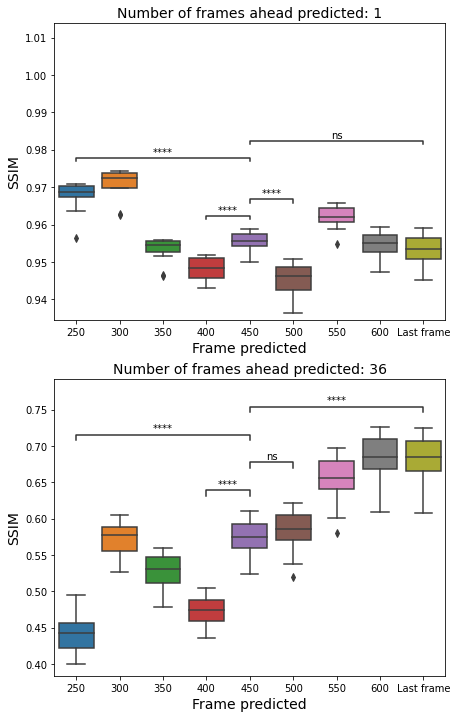

In [44]:
fig, axs = plt.subplots(2, 1, figsize=(7, 12))

df_results_timeframe = df_results[df_results['predicted_frame'] == 1].copy()
x = "frame_to_predict"
y = "ssim_11"
df_results_timeframe['frame_to_predict'][df_results_timeframe['frame_to_predict'] == 417] = 'Last frame'
df_results_timeframe['frame_to_predict'][df_results_timeframe['frame_to_predict'] == 400] = 600
df_results_timeframe['frame_to_predict'][df_results_timeframe['frame_to_predict'] == 350] = 550
df_results_timeframe['frame_to_predict'][df_results_timeframe['frame_to_predict'] == 300] = 500
df_results_timeframe['frame_to_predict'][df_results_timeframe['frame_to_predict'] == 250] = 450
df_results_timeframe['frame_to_predict'][df_results_timeframe['frame_to_predict'] == 200] = 400
df_results_timeframe['frame_to_predict'][df_results_timeframe['frame_to_predict'] == 150] = 350
df_results_timeframe['frame_to_predict'][df_results_timeframe['frame_to_predict'] == 100] = 300
df_results_timeframe['frame_to_predict'][df_results_timeframe['frame_to_predict'] == 50] = 250
box_pairs=[
    ((250), (450)),
    ((400), (450)),
    ((500), (450)),
    (('Last frame'), (450))
]

ax = sns.boxplot(data=df_results_timeframe, x=x, y=y, ax=axs[0])
add_stat_annotation(ax, data=df_results_timeframe, x=x, y=y, box_pairs=box_pairs,
                    test='t-test_ind', loc='inside', verbose=2)
axs[0].set_xlabel("Frame predicted", fontsize=14)
axs[0].set_ylabel("SSIM", fontsize=14)
axs[0].set_title("Number of frames ahead predicted: 1", fontsize=14)


df_results_timeframe = df_results[df_results['predicted_frame'] == 36].copy()
x = "frame_to_predict"
y = "ssim_11"
df_results_timeframe['frame_to_predict'][df_results_timeframe['frame_to_predict'] == 417] = 'Last frame'
df_results_timeframe['frame_to_predict'][df_results_timeframe['frame_to_predict'] == 400] = 600
df_results_timeframe['frame_to_predict'][df_results_timeframe['frame_to_predict'] == 350] = 550
df_results_timeframe['frame_to_predict'][df_results_timeframe['frame_to_predict'] == 300] = 500
df_results_timeframe['frame_to_predict'][df_results_timeframe['frame_to_predict'] == 250] = 450
df_results_timeframe['frame_to_predict'][df_results_timeframe['frame_to_predict'] == 200] = 400
df_results_timeframe['frame_to_predict'][df_results_timeframe['frame_to_predict'] == 150] = 350
df_results_timeframe['frame_to_predict'][df_results_timeframe['frame_to_predict'] == 100] = 300
df_results_timeframe['frame_to_predict'][df_results_timeframe['frame_to_predict'] == 50] = 250
box_pairs=[
    ((250), (450)),
    ((400), (450)),
    ((500), (450)),
    (('Last frame'), (450))
]

ax = sns.boxplot(data=df_results_timeframe, x=x, y=y, ax=axs[1])
add_stat_annotation(ax, data=df_results_timeframe, x=x, y=y, box_pairs=box_pairs,
                    test='t-test_ind', loc='inside', verbose=2)
axs[1].set_xlabel("Frame predicted", fontsize=14)
axs[1].set_ylabel("SSIM", fontsize=14)
axs[1].set_title("Number of frames ahead predicted: 36", fontsize=14)

#### Images

Input

(998, 998, 3)


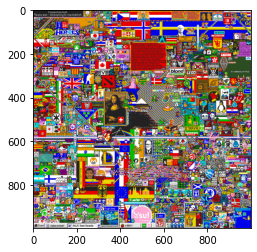

In [21]:
image_s = []

filepath = 'output/images/input_red_noFrames400_noFramesPredicted36_size3.png'
image = (cv2.imread(filepath, cv2.IMREAD_GRAYSCALE).reshape(998, 998, 1).astype(int) - 255) * -1
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_s = image

filepath = 'output/images/input_green_noFrames400_noFramesPredicted36_size3.png'
image = (cv2.imread(filepath, cv2.IMREAD_GRAYSCALE).reshape(998, 998, 1).astype(int) - 255) * -1
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_s = np.concatenate((image_s, image), axis=2)

filepath = 'output/images/input_blue_noFrames400_noFramesPredicted36_size3.png'
image = (cv2.imread(filepath, cv2.IMREAD_GRAYSCALE).reshape(998, 998, 1).astype(int) - 255) * -1
image_s = np.concatenate((image_s, image), axis=2)

image_input_s = np.array(image_s)
print(image_input_s.shape)
plt.imshow(image_input_s)

Prediction 36 timeframes

(998, 998, 3)


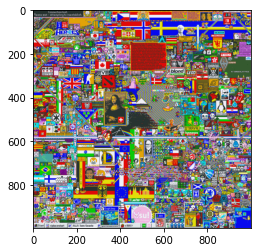

In [22]:
image_s = []

filepath = 'output/images/outputPred_red_noFrames400_noFramesPredicted36_size3.png'
image = (cv2.imread(filepath, cv2.IMREAD_GRAYSCALE).reshape(998, 998, 1).astype(int) - 255) * -1
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_s = image

filepath = 'output/images/outputPred_green_noFrames400_noFramesPredicted36_size3.png'
image = (cv2.imread(filepath, cv2.IMREAD_GRAYSCALE).reshape(998, 998, 1).astype(int) - 255) * -1
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_s = np.concatenate((image_s, image), axis=2)

filepath = 'output/images/outputPred_blue_noFrames400_noFramesPredicted36_size3.png'
image = (cv2.imread(filepath, cv2.IMREAD_GRAYSCALE).reshape(998, 998, 1).astype(int) - 255) * -1
image_s = np.concatenate((image_s, image), axis=2)

image_outputPred_36timeframe_s = np.array(image_s)
print(image_outputPred_36timeframe_s.shape)
plt.imshow(image_outputPred_36timeframe_s)

Prediction 1 timeframes

(998, 998, 3)


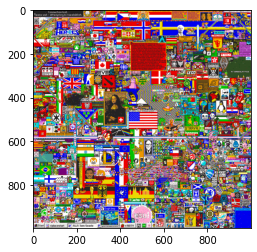

In [23]:
image_s = []

filepath = 'output/images/outputPred_red_noFrames400_noFramesPredicted1_size3.png'
image = (cv2.imread(filepath, cv2.IMREAD_GRAYSCALE).reshape(998, 998, 1).astype(int) - 255) * -1
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_s = image

filepath = 'output/images/outputPred_green_noFrames400_noFramesPredicted1_size3.png'
image = (cv2.imread(filepath, cv2.IMREAD_GRAYSCALE).reshape(998, 998, 1).astype(int) - 255) * -1
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_s = np.concatenate((image_s, image), axis=2)

filepath = 'output/images/outputPred_blue_noFrames400_noFramesPredicted1_size3.png'
image = (cv2.imread(filepath, cv2.IMREAD_GRAYSCALE).reshape(998, 998, 1).astype(int) - 255) * -1
image_s = np.concatenate((image_s, image), axis=2)

image_outputPred_1timeframe_s = np.array(image_s)
print(image_outputPred_1timeframe_s.shape)
plt.imshow(image_outputPred_1timeframe_s)

Real

(998, 998, 3)


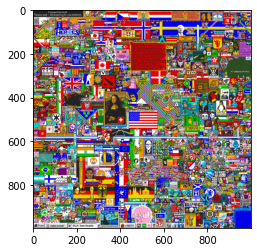

In [24]:
image_s = []

filepath = 'output/images/outputReal_red_noFrames400_noFramesPredicted36_size3.png'
image = (cv2.imread(filepath, cv2.IMREAD_GRAYSCALE).reshape(998, 998, 1).astype(int) - 255) * -1
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_s = image

filepath = 'output/images/outputReal_green_noFrames400_noFramesPredicted36_size3.png'
image = (cv2.imread(filepath, cv2.IMREAD_GRAYSCALE).reshape(998, 998, 1).astype(int) - 255) * -1
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_s = np.concatenate((image_s, image), axis=2)

filepath = 'output/images/outputReal_blue_noFrames400_noFramesPredicted36_size3.png'
image = (cv2.imread(filepath, cv2.IMREAD_GRAYSCALE).reshape(998, 998, 1).astype(int) - 255) * -1
image_s = np.concatenate((image_s, image), axis=2)

image_outputReal_s = np.array(image_s)
print(image_outputReal_s.shape)
plt.imshow(image_outputReal_s)

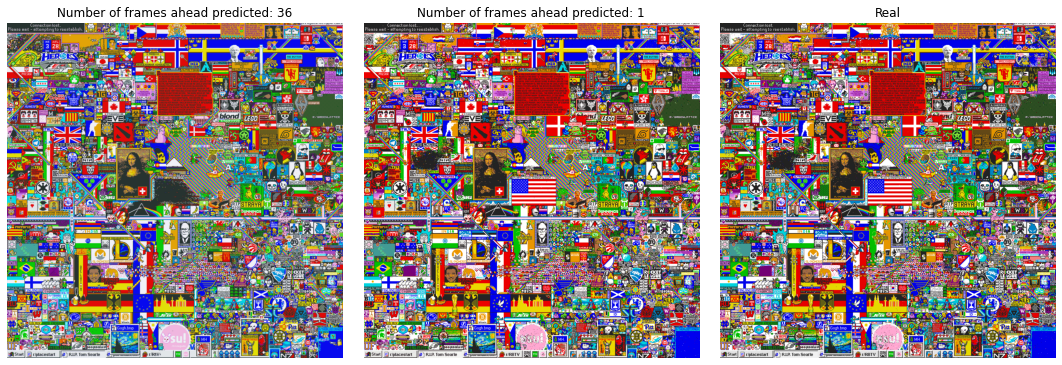

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image_outputPred_36timeframe_s)
axs[0].axis('off')
axs[0].set_title('Number of frames ahead predicted: 36')
axs[1].imshow(image_outputPred_1timeframe_s)
axs[1].axis('off')
axs[1].set_title('Number of frames ahead predicted: 1')
axs[2].imshow(image_outputReal_s)
axs[2].axis('off')
axs[2].set_title('Real')
plt.tight_layout()

#### Multiple frames predicted

In [27]:
df = pd.read_csv('prediction_multiple.csv')
df

,color,frame_to_predict,max_trained_frame,predicted_frame,size_window,ssim_11_frame1,ssim_11_frame2,ssim_11_frame3,ssim_11_frame4,ssim_11_frame5,ssim_11_frame6,ssim_11_frame7,ssim_11_frame8,ssim_11_frame9,ssim_11_frame10
0,red,50,50,1,3,0.9637,0.9549,0.9462,0.9374,0.9280,0.9181,0.9070,0.8949,0.8821,0.8688
1,green,50,50,1,3,0.9681,0.9593,0.9492,0.9398,0.9310,0.9223,0.9139,0.9057,0.8974,0.8890
2,blue,50,50,1,3,0.9704,0.9651,0.9560,0.9440,0.9294,0.9123,0.8933,0.8723,0.8497,0.8259
3,red,50,50,6,3,0.8768,0.8576,0.8431,0.8312,0.8202,0.8097,0.7991,0.7885,0.7779,0.7677
4,green,50,50,6,3,0.8872,0.8758,0.8659,0.8571,0.8484,0.8394,0.8303,0.8211,0.8121,0.8033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,green,-1,400,18,3,0.7935,0.7310,0.6680,0.6090,0.5552,0.5068,0.4635,0.4248,0.3901,0.3587
428,blue,-1,400,18,3,0.7837,0.7169,0.6415,0.5633,0.4873,0.4166,0.3531,0.2974,0.2495,0.2094
429,red,-1,400,36,3,0.7246,0.6644,0.6052,0.5479,0.4936,0.4422,0.3932,0.3459,0.3000,0.2558
430,green,-1,400,36,3,0.6880,0.5847,0.4937,0.4148,0.3487,0.2934,0.2477,0.2098,0.1786,0.1528


In [48]:
no_frames_s, ssim_s = [], []
for idx, row in df.iterrows():
    for j in range(10):
        if row['predicted_frame'] == 1:
            column = f'ssim_11_frame{j+1}'
            no_frames_s.append(j+1)
            ssim_s.append(row[column])
no_frames_s = np.array(no_frames_s).reshape(-1, 1)
ssim_s = np.array(ssim_s).reshape(-1, 1)
df_predicted = pd.DataFrame(np.concatenate((no_frames_s, ssim_s), axis=1), columns=['no', 'ssim'])
df_predicted['no'] = df_predicted['no'].astype(int)
print(df_predicted.shape)

(1080, 2)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 2: t-test independent samples with Bonferroni correction, P_val=4.174e-06 stat=4.967e+00
1 v.s. 5: t-test independent samples with Bonferroni correction, P_val=1.735e-27 stat=1.272e+01
1 v.s. 10: t-test independent samples with Bonferroni correction, P_val=1.226e-30 stat=1.371e+01


Text(0.5, 1.0, 'Number of frames ahead predicted: 1')

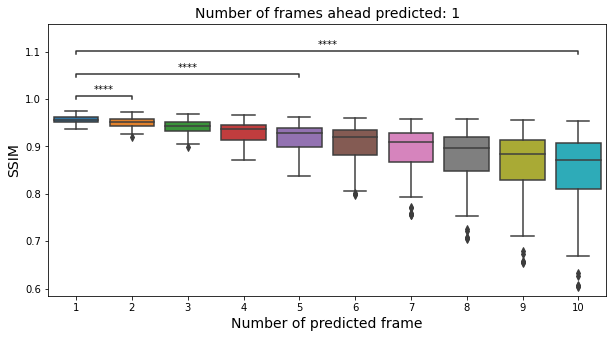

In [54]:
# Q: Is there any difference for how early the frame is predicted?
# A: As we can see, how early we make the prediction influences the result.

x = "no"
y = "ssim"
box_pairs=[
    ((1), (2)),
    ((1), (5)),
    ((1), (10))
]
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.boxplot(data=df_predicted, x=x, y=y, ax=axs)
add_stat_annotation(ax, data=df_predicted, x=x, y=y, box_pairs=box_pairs,
                    test='t-test_ind', loc='inside', verbose=2)
axs.set_xlabel("Number of predicted frame", fontsize=14)
axs.set_ylabel("SSIM", fontsize=14)
axs.set_title("Number of frames ahead predicted: 1", fontsize=14)